In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array, ImageDataGenerator
from tensorflow.keras import optimizers, losses
import zipfile

In [2]:
# Unzipping dataset
source_path = "/content/happy or sad.zip"
zip_ref = zipfile.ZipFile(source_path, "r")
zip_ref.extractall("./data/")
zip_ref.close()

Sample happy image:


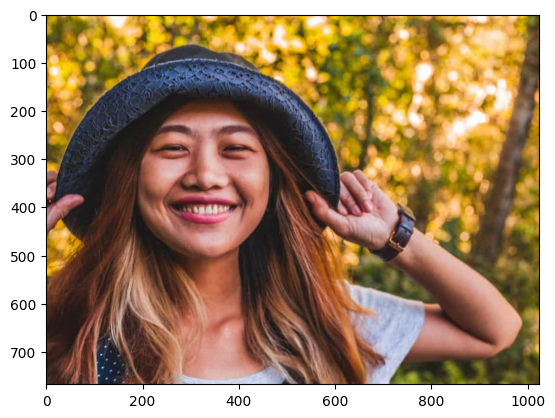


Sample sad image:


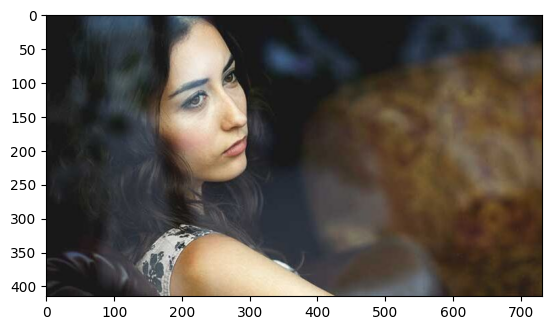

In [3]:
base_dir = "./data/data/"
happy_dir = os.path.join(base_dir, "happy/")
sad_dir = os.path.join(base_dir, "sad/")

print("Sample happy image:")
plt.imshow(load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}"))
plt.show()

print("\nSample sad image:")
plt.imshow(load_img(f"{os.path.join(sad_dir, os.listdir(sad_dir)[0])}"))
plt.show()

In [4]:
# Load the first example of a happy face
sample_image  = load_img(f"{os.path.join(happy_dir, os.listdir(happy_dir)[0])}")

# Convert the image into its numpy array representation
sample_array = img_to_array(sample_image)

print(f"Each image has shape: {sample_array.shape}")

print(f"The maximum pixel value used is: {np.max(sample_array)}")

Each image has shape: (768, 1024, 3)
The maximum pixel value used is: 255.0


In [5]:
# Defining callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') is not None and logs.get('accuracy') > 0.999:
            print("\nReached 99.9% accuracy so cancelling training!")
            self.model.stop_training = True

In [6]:
# Image Data Generator function
def image_generator(directory=None, target_size=(None, None), batch_size=32, class_mode='binary'):

    # Instantiate the ImageDataGenerator class.
    train_datagen = ImageDataGenerator(rescale=1/255)

    train_generator = train_datagen.flow_from_directory(directory=directory,
                                                        target_size=target_size,
                                                        batch_size=batch_size,
                                                        class_mode=class_mode)

    return train_generator

In [11]:
# Definining model
def train_happy_sad_model(train_generator, callbacks=None, loss=None, optimizer=None, epochs=None):

    # Instantiate the callback
    callbacks = callbacks

    # Define the model
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    # Compile the model
    model.compile(loss=loss,
                  optimizer=optimizer,
                  metrics=['accuracy'])


    # Train the model
    history = model.fit(x=train_generator,
                        epochs=epochs,
                        callbacks=[callbacks]
                       )

    return history, model

In [12]:
# Creating object of callbacks
callbacks = myCallback()

# Saving generator in a variable
gen = image_generator(directory=base_dir, target_size=(150, 150), batch_size=10, class_mode='binary')

loss = tf.keras.losses.BinaryCrossentropy()
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.001)
epochs = 20

Found 167 images belonging to 2 classes.


In [13]:
# Training the model
history, model = train_happy_sad_model(train_generator=gen, callbacks=callbacks, loss=loss, optimizer=optimizer, epochs=epochs)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 180ms/step - accuracy: 0.4924 - loss: 1.1513
Epoch 2/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.4984 - loss: 0.6914
Epoch 3/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 187ms/step - accuracy: 0.6456 - loss: 0.6665
Epoch 4/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - accuracy: 0.7174 - loss: 0.6248
Epoch 5/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 184ms/step - accuracy: 0.6991 - loss: 0.6235
Epoch 6/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.8017 - loss: 0.4867
Epoch 7/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 199ms/step - accuracy: 0.8407 - loss: 0.3759
Epoch 8/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.8591 - loss: 0.3218
Epoch 9/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - accuracy: 0.9107 - loss: 0.2512
Epoch 10/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 186ms/step - accuracy: 0.9302 - loss: 0.1797
Epoch 11/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 164ms/step - accuracy: 0.9770 - loss: 0.0910
Epoch 12/20
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 179ms/step - accuracy